# Identifying Entities in Healthcare Data

# Github link
https://github.com/charliethomasct82/HealthCare-Data

# Problem Statement
**we need to build a custom NER to get the list of diseases and their treatment from the dataset and model should be able to predict the treatment for given disease**

### I have used following command on command line to install necessary package
pip install pycrf

pip install sklearn-crfsuite

## Workspace set up: Import and Install useful packages.

In [1]:
# Importing the necessary libraries
import spacy
import sklearn_crfsuite
from sklearn_crfsuite import metrics

model = spacy.load("en_core_web_sm")
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

The dataset provided is in the form of one word per line. Let's understand the format of data below:
- Suppose there are *x* words in a sentence, then there will be *x* continuous lines with one word in each line. 
- Further, the two sentences are separated by empty lines. The labels for the data follow the same format.

**We need to pre-process the data to recover the complete sentences and their labels.**


### Construct the proper sentences from individual words and print the 5 sentences.

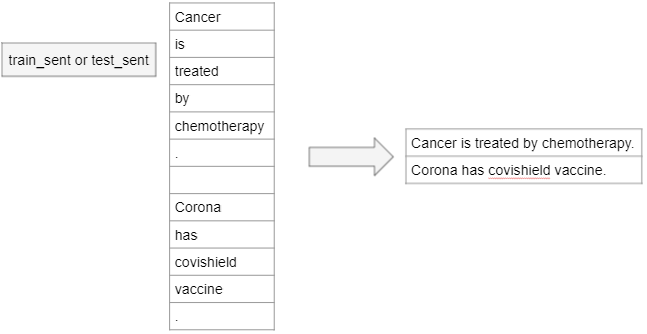

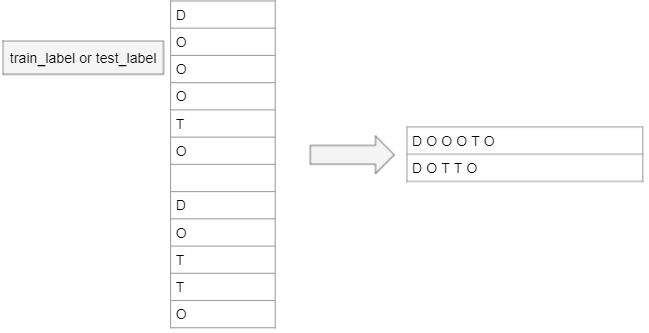

### To unpack the given corpus which is given one word at a time in one line, and create sentences out of the, I have created this function below named 'unpack_file'. This function takes the file name as input and unpacks line by line to form sentences. It returns the List of sentences to the calling module.

In [2]:
def unpack_file(file_name):
    ''' This function takes the file name as input and unpacks line by line to form sentences. It returns the List of sentences'''
    file=open(file_name,'r') # Open the file
    data=file.readlines() # Perform line by line reading
    file.close() # Close the file
    L=[];sent=[] # initialize two empty lists L is temporary to create each sentence and sent is the list of sentences returned
    for line in data:
        if line == '\n': # empty line encountered
            sent.append(" ".join(L)) # Creating a sentence
            L=[] # reset the temporary list
        else: 
            L.append(line.rstrip('\n')) # Keep adding to the temporary list
    return sent

# Task 1:

Constructs proper sentences from individual words and prints five sentences.

Correctly counts the number of sentences in the processed train and test dataset.

Correctly counts the number of lines of labels in the processed train and test datasets.

In [3]:
# Unpacking the train sentences
train_set=unpack_file('train_sent')
train_set[0:5] # Printing 5 sentences from 0-4

['All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status )',
 'The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )',
 'Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 )',
 "The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 )",
 "Arrest of dilation was the most common indication in both `` corrected '' subgroups ( 23.4 and 24.6 % , respectively )"]

In [4]:
# Unpacking train labels
train_label=unpack_file('train_label')
train_label[0:5] # Checking 5 labels from 0-4

['O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O']

In [5]:
# Unpacking test sentences
test_set=unpack_file('test_sent')
test_set[:5] # printing first 5 sentences from test sentences

['Furthermore , when all deliveries were analyzed , regardless of risk status but limited to gestational age > or = 36 weeks , the rates did not change ( 12.6 % , 280 of 2214 ; primary 9.2 % , 183 of 1994 )',
 'As the ambient temperature increases , there is an increase in insensible fluid loss and the potential for dehydration',
 'The daily high temperature ranged from 71 to 104 degrees F and AFI values ranged from 1.7 to 24.7 cm during the study period',
 'There was a significant correlation between the 2- , 3- , and 4-day mean temperature and AFI , with the 4-day mean being the most significant ( r = 0.31 , p & # 60 ; 0.001 )',
 'Fluctuations in ambient temperature are inversely correlated to changes in AFI']

In [6]:
# Unpacking test labels
test_label=unpack_file('test_label')
test_label[:5] # Checking first 5 labels from test labels

['O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O']

In [7]:
# Printing the lenght of the train and test data set
total_sent_train=train_set
print('Total number of sentence in train set',len(total_sent_train))
total_sent_test=test_set
print('Total number of sentence in train set',len(total_sent_test))

Total number of sentence in train set 2599
Total number of sentence in train set 1056


In [8]:
# Combining trains and test sentences for Exploratory data analysis
total_sent = train_set+test_set
len(total_sent)

3655

#### Observe 3655 total sentences in the corpus

In [9]:
# Printing the lenght of the train and test data set
total_label_train=train_label
print('Total number of sentence in train set',len(total_label_train))
total_label_test=test_label
print('Total number of sentence in train set',len(total_label_test))

Total number of sentence in train set 2599
Total number of sentence in train set 1056


In [10]:
# Combining trains and test labels for Exploratory data analysis
total_labels=train_label+test_label
len(total_labels)

3655

#### Similarly, observe 3655 total labels in the entire given corpus

In [11]:
# Creating a dataframe out of the given sentences and labels
df=pd.DataFrame(list(zip(total_sent,total_labels)), columns=['sentences','labels'])
df.head()

,sentences,labels
0,All live births > or = 23 weeks at the Univers...,O O O O O O O O O O O O O O O O O O O O O O O ...
1,The total cesarean rate was 14.4 % ( 344 of 23...,O O O O O O O O O O O O O O O O O O O O O O O O O
2,Abnormal presentation was the most common indi...,O O O O O O O O O O O O O O O
3,The `` corrected '' cesarean rate ( maternal-f...,O O O O O O O O O O O O O O O O O O O O O O O ...
4,Arrest of dilation was the most common indicat...,O O O O O O O O O O O O O O O O O O O O O O


In [12]:
# Creating new columns which is the total number of O tags, D tags and T tags in a sentence/document

df['O_label']=df.labels.apply(lambda x: len(re.findall('O',x))) # Get total number of O labels in the given sentence
df['D_label']=df.labels.apply(lambda x: len(re.findall('D',x))) # Get total number of D labels in the given sentence
df['T_label']=df.labels.apply(lambda x: len(re.findall('T',x))) # Get total number of T labels in the given sentence
df.tail(20) # Checking the last 20 rows of the dataframe

,sentences,labels,O_label,D_label,T_label
3635,The outcome of arthroscopic treatment of tempo...,O O O T T O D D D,4,3,2
3636,Neostigmine for acute colonic pseudo-obstruction,T O D D D,1,3,1
3637,< TO_SEE > The effect of bisoprolol on periope...,O O O O O O T O D D O D D O O O O T T,12,4,3
3638,Surgical management of severe secondary perito...,T T O D D D,1,3,2
3639,Treatment of hypertension with ascorbic acid,O O D O T T,3,1,2
3640,Efficacy of open-bite treatment with the Thera...,O O D O O O T,5,1,1
3641,Hepatic arterial infusion of chemotherapy afte...,O O O O T O T O D D O D D,7,4,2
3642,Evidence for double resistance to permethrin a...,O O O O O T T T O D D,6,2,3
3643,Urgent colonoscopy for the diagnosis and treat...,O T O O O O O O D D D,7,3,1
3644,"Effects of tolcapone , a catechol-O-methyltran...",O O T T T T T O O O O O O O T O O O D D D O,13,3,6


### Exploratory data analysis 

In [13]:
df.shape

(3655, 5)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentences  3655 non-null   object
 1   labels     3655 non-null   object
 2   O_label    3655 non-null   int64 
 3   D_label    3655 non-null   int64 
 4   T_label    3655 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 142.9+ KB


In [15]:
df.describe()

,O_label,D_label,T_label
count,3655.000000,3655.000000,3655.000000
mean,15.269494,1.337620,1.045417
std,12.396386,2.109442,2.377397
min,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000
50%,12.000000,0.000000,0.000000
75%,21.000000,2.000000,1.000000
max,125.000000,34.000000,30.000000


#### We can clearly observe here that the number of D labels at 50% quantile is 0 which indicates that less than half of the given corpus have the D labels and even lesser corpus have T labels. Note that even T labels are 0 at 50% quantile.

In [16]:
df[df.T_label>25]

,sentences,labels,O_label,D_label,T_label
2037,only the combination of a cell wall-active ant...,O O T T T T T T T T T T T T T T T T T T T T T ...,21,9,30
2090,objective : to examine the effectiveness of ni...,O O O O O O O T T T T T T T T T T T T T T T T ...,9,2,28
2315,A three-step treatment algorithm for refractor...,O O O O O D D O O T T T T T T T T T T T T T T ...,22,2,28


### Let's find the total number of Labels as T,O and D.

In [17]:
df.T_label.sum()

3821

In [18]:
df.O_label.sum()

55810

In [19]:
df.D_label.sum()

4889

In [20]:
df[(df.T_label==0)&(df.D_label==0)]

,sentences,labels,O_label,D_label,T_label
0,All live births > or = 23 weeks at the Univers...,O O O O O O O O O O O O O O O O O O O O O O O ...,45,0,0
1,The total cesarean rate was 14.4 % ( 344 of 23...,O O O O O O O O O O O O O O O O O O O O O O O O O,25,0,0
2,Abnormal presentation was the most common indi...,O O O O O O O O O O O O O O O,15,0,0
3,The `` corrected '' cesarean rate ( maternal-f...,O O O O O O O O O O O O O O O O O O O O O O O ...,38,0,0
4,Arrest of dilation was the most common indicat...,O O O O O O O O O O O O O O O O O O O O O O,22,0,0
...,...,...,...,...,...
3410,Relatives in the resuscitation room : their po...,O O O O O O O O O O,10,0,0
3412,Subcutaneous autologous ovarian transplantatio...,O O O O O O O O O O,10,0,0
3417,Adolescent pregnancy and sexual abuse,O O O O O,5,0,0
3418,Still hard to know how large the benefits will...,O O O O O O O O O O O,11,0,0


#### Total of 1843 rows in the total sentences has only O (Others) tags. 

## Plotting Distribution of O, D, And T labels

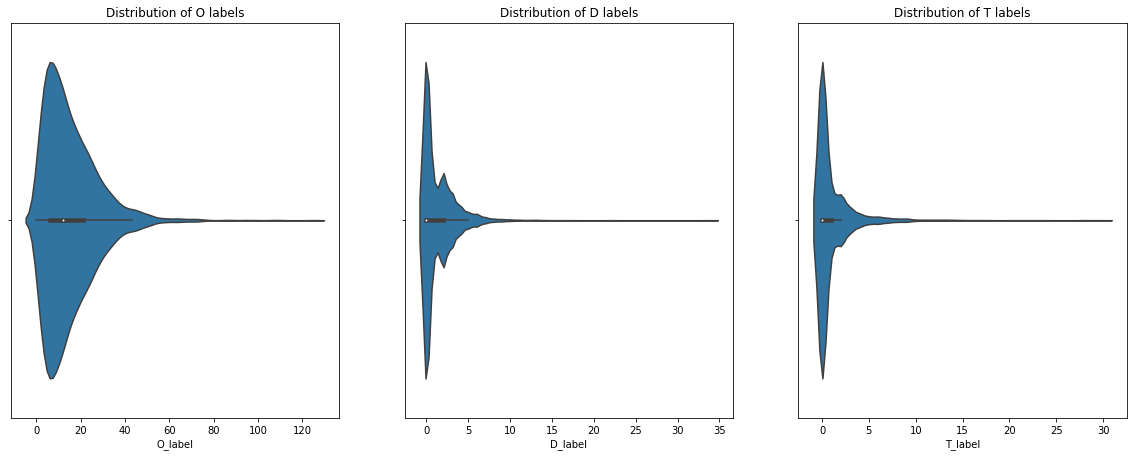


The distribution of the O label is above 120 in some sentences while its overall range of its values lie around 0 to 45.
The distribution of the D label is close to 35 in some sentences while its overall range of its values lie around 0 to 7.
The distribution of the T label is close to 30 in some sentences while its overall range of its values lie around 0 to 3.


In [21]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
plt.title('Distribution of O labels')
sns.violinplot(df.O_label)
plt.subplot(2,3,2)
plt.title('Distribution of D labels')
sns.violinplot(df.D_label)
plt.subplot(2,3,3)
plt.title('Distribution of T labels')
sns.violinplot(df.T_label)
plt.show()

print()

print("The distribution of the O label is above 120 in some sentences while its overall range of its values lie around 0 to 45.")
print("The distribution of the D label is close to 35 in some sentences while its overall range of its values lie around 0 to 7.")
print("The distribution of the T label is close to 30 in some sentences while its overall range of its values lie around 0 to 3.")

#### During the EDA we can observe that per sentence, the distribution of the O label is above 120 in some sentences while its overall range  of its values lie around 0 to 40. 
#### We also observe that there are comparatively few sentences that has D labels and even lesser of T labels.
#### This observation can also be verifed in the describe function of the labels.

### Count the number of sentences in the processed train and test dataset 

In [22]:
print('Number of sentences in the train set: ',len(train_set))
print('Number of sentences in the test set: ',len(test_set))

Number of sentences in the train set:  2599
Number of sentences in the test set:  1056


### Count the number of lines of labels in the processed train and test dataset.

In [23]:
print('Number of labels in the train set: ',len(train_label))
print('Number of labels in the test set: ',len(test_label))

Number of labels in the train set:  2599
Number of labels in the test set:  1056


# Task 2:
Extract those tokens that have NOUN or PROPN as their PoS tag and finds their frequency from the entire dataset that comprises both the train and the test datasets.

Prints the top 25 most common tokens with NOUN or PROPN PoS tags for the entire dataset that comprises both the train and the test datasets

## Concept Identification

We will first explore what are the various concepts present in the dataset. For this, we will use PoS Tagging. 



### Extract those tokens which have NOUN or PROPN as their PoS tag and find their frequency

In [24]:
noun_or_propn=[] # initialize empty list
for review in total_sent: #looping through all sentences i.e. train and test sentences
    doc=model(review) # applying the NLP model on the sentence
    for token in doc: # Looping through the tokens created by the model
        if token.pos_=='NOUN' or token.pos_=='PROPN': # Checking if the pos_ tag is 'NOUN' or 'PROPN' 
            noun_or_propn.append(token.lemma_.lower()) # add to the list

### Print the top 25 most common tokens with NOUN or PROPN PoS tags

In [25]:
pd.Series(noun_or_propn).value_counts().head(25)

patient         570
treatment       316
%               247
study           234
cancer          226
cell            203
therapy         182
effect          181
disease         170
group           145
case            132
lung            120
gene            111
result          109
year            105
rate            103
chemotherapy     91
use              90
trial            90
conclusion       89
woman            89
analysis         86
protein          82
response         81
risk             78
dtype: int64

#### Here we can observe the top 25 noun and proper nouns. This indicates that the data is of a study about cancer, effects, therapy, case study, lung. We can observe 91 counts of chemotherapy. 

In [26]:
dict_of_words=pd.Series(noun_or_propn).value_counts().to_dict()
dict_of_words

{'patient': 570,
 'treatment': 316,
 '%': 247,
 'study': 234,
 'cancer': 226,
 'cell': 203,
 'therapy': 182,
 'effect': 181,
 'disease': 170,
 'group': 145,
 'case': 132,
 'lung': 120,
 'gene': 111,
 'result': 109,
 'year': 105,
 'rate': 103,
 'chemotherapy': 91,
 'use': 90,
 'trial': 90,
 'conclusion': 89,
 'woman': 89,
 'analysis': 86,
 'protein': 82,
 'response': 81,
 'risk': 78,
 'child': 77,
 'mutation': 75,
 'tumor': 74,
 'drug': 74,
 'surgery': 73,
 'control': 70,
 'p': 70,
 'method': 70,
 'infection': 68,
 'survival': 67,
 'factor': 66,
 'day': 63,
 'evidence': 62,
 'combination': 62,
 'health': 61,
 'term': 61,
 'age': 61,
 'activity': 60,
 'syndrome': 60,
 'dose': 59,
 'acid': 59,
 'management': 56,
 'care': 56,
 'stage': 55,
 'c': 54,
 'datum': 54,
 'month': 54,
 'carcinoma': 54,
 'time': 52,
 'diagnosis': 52,
 'bone': 52,
 'role': 50,
 'outcome': 49,
 'mg': 48,
 'week': 48,
 'b': 46,
 'blood': 46,
 'pregnancy': 46,
 'family': 45,
 'practice': 45,
 'heart': 45,
 'system': 44

In [27]:
#Printing the total number of words tagged as Noun/Pronoun
print('the total number of words tagged as Noun/Pronoun: ',len(noun_or_propn))

the total number of words tagged as Noun/Pronoun:  24289


# Task 3:
Defines the features with the PoS tag as one of the features.

While defining the features in which you have used the PoS tags, you also need to consider the preceding word of the current word. The use of the previous word’s information makes the CRF model more accurate and exhaustive.

Marks the beginning and end words of a sentence correctly in the form of features.

#### As we can see we have 24,289 words found that has parts of speech (PoS) tag of nouns or proper nouns from our model

## Defining features for CRF





#### Computing Features using the following features for our input sequences.
#### We have defined the following features for CRF model building:

- f1=postag of the word
- f2=word in lower case
- f3=last 3 characters of the word
- f4=last 2 characters of the word
- f5=1; if the word is in uppercase, otherwise 0
- f6=1; if word is a number; otherwise 0
- f7=1; if the word starts with a capital letter, otherwise 0

If the given word is not the beginning of the sentence, we include the features of the previous word too

- F8= posttag of the previous word
- f9= previous word in lower case
- f10 = 1; if previous word in upper case, otherwise 0
- f11 = 1; if previous word is digit, otherwise 0
- f12 =1; if previous word is starting with uppercase, otherwise 0.

Now, knowing the position of the word is preferable, whether it appears at the beginning or at the end of the sentence. For this, you have defined two more features as shown below:

- f13 (‘BEG’): This feature will return ‘BEG’ if the word is the first word of the sentence.
- f14 (‘END’): This feature will return ‘END’ if the word is the last word of the sentence.




 



In [28]:
# Let's define the features to get the feature value for one word.
def getFeaturesForOneWord(sentence, pos):
  word=sentence[pos]
  for token in model(word):
    word_pos_tag=token.pos_
  features=[
    'word.postag='+word_pos_tag, # f1 is the PoS tag of the word
    'word.lower='+word.lower(), # f2 is input word is in lower case
    'word[-3:]='+word[-3:], # Last three characters(f3)
    'word[-2:]='+word[-2:], # Last two characters(f4)
    'word.isupper=%s' % word.isupper(), # (f5)is the word in all upper case
    'word.isdigit=%s' % word.isdigit(), # (f6)is the word a number
    'words.startsWithCapital=%s' %word[0].isupper() # (f7)is the word starting with capital letter
  ]
  if pos>0:
    prev_word=sentence[pos-1]
    for token in model(prev_word):
      prev_word_pos_tag=token.pos_
    features.extend([
      'prev_word.postag='+prev_word_pos_tag, # f8 previous word PoS tag
      'prev_word.lower=' + prev_word.lower(), # f9 previous word in lower case
      'prev_word.isupper=%s' % prev_word.isupper(), # f10 is previous word in upper case
      'prev_word.isdigit=%s' % prev_word.isdigit(), # f11 is previous word a number
      'prev_words.startsWithCapital=%s' % prev_word[0].isupper() #f12 is previous word starting with capital letter
    ])
  else:
    features.append('BEG') # f13 Beginning of sentence
    #print(features)
  if (pos == len(sentence)-1):
    features.append('END')# f14 End of sentence
    #print(features)
  return features

# Task4:

Writes the code to compute the features' value of a sentence.

Writes the code to get a list of labels of a given preprocessed label line that you have created earlier.

## Getting the features

### Write a code/function to get the features for a sentence

In [29]:
# Write a code to get features for a sentence.
def getFeaturesForOneSentence(sentence):
  sentence_list = sentence.split()
  return [getFeaturesForOneWord(sentence_list, pos) for pos in range(len(sentence_list))]

### Write a code/function to get the labels of a sentence

In [30]:
# Write a code to get the labels for a sentence.
def getLabelsInListForOneSentence(labels):
  return labels.split()

In [31]:
# Checking the workings of our feature on an example sentence from the trains set 
example_sentence = train_set[100] # Choosing 6th sentence
print(example_sentence) # Printing the entire sentence for reference

example_features = getFeaturesForOneSentence(example_sentence)
example_features[4] # Choosing the position of the word

All women were expectantly managed without tocolytics until 37 weeks ' gestation unless they developed clinical chorioamnionitis , or nonreassuring fetal heart rate tracing or biophysical profile


['word.postag=VERB',
 'word.lower=managed',
 'word[-3:]=ged',
 'word[-2:]=ed',
 'word.isupper=False',
 'word.isdigit=False',
 'words.startsWithCapital=False',
 'prev_word.postag=ADV',
 'prev_word.lower=expectantly',
 'prev_word.isupper=False',
 'prev_word.isdigit=False',
 'prev_words.startsWithCapital=False']

In [32]:
# checking if first word in the sentence marked as 'BEG'
# Checking the workings of our feature on an example sentence from the trains set 
example_sentence = train_set[100] # Choosing 6th sentence
print(example_sentence) # Printing the entire sentence for reference

example_features = getFeaturesForOneSentence(example_sentence)
example_features[0] # Choosing the last word

All women were expectantly managed without tocolytics until 37 weeks ' gestation unless they developed clinical chorioamnionitis , or nonreassuring fetal heart rate tracing or biophysical profile


['word.postag=PRON',
 'word.lower=all',
 'word[-3:]=All',
 'word[-2:]=ll',
 'word.isupper=False',
 'word.isdigit=False',
 'words.startsWithCapital=True',
 'BEG']

In [33]:
# checking if last word in the sentence marked as 'END'
# Checking the workings of our feature on an example sentence from the trains set 
example_sentence = train_set[100] # Choosing 6th sentence
print(example_sentence) # Printing the entire sentence for reference

example_features = getFeaturesForOneSentence(example_sentence)
example_features[-1] # Choosing the last word

All women were expectantly managed without tocolytics until 37 weeks ' gestation unless they developed clinical chorioamnionitis , or nonreassuring fetal heart rate tracing or biophysical profile


['word.postag=NOUN',
 'word.lower=profile',
 'word[-3:]=ile',
 'word[-2:]=le',
 'word.isupper=False',
 'word.isdigit=False',
 'words.startsWithCapital=False',
 'prev_word.postag=ADJ',
 'prev_word.lower=biophysical',
 'prev_word.isupper=False',
 'prev_word.isdigit=False',
 'prev_words.startsWithCapital=False',
 'END']

#### As we can see the features are correctly defined for the word hospitals

# Task 5:
Extracts the features' values for each sentence as an input variable for the CRF model in the test and the train datasets.
Extracts the labels as the target variable for the test and the train datasets.

## Define input and target variables


Correctly computing X and Y sequence matrices for training and test data.
Check that both sentences and labels are processed

### Extract the features' values for each sentence as input variable  for CRF model in test and the train dataset 

In [ ]:
X_train = [getFeaturesForOneSentence(sentence) for sentence in train_set]
Y_train = [getLabelsInListForOneSentence(labels) for labels in train_label]

### Extract the labels as the target variable for test and the train dataset

In [ ]:
X_test = [getFeaturesForOneSentence(sentence) for sentence in test_set]
Y_test = [getLabelsInListForOneSentence(labels) for labels in test_label]

# Task 6:
    
Builds the CRF model for a custom NER application

## Build the CRF Model

In [ ]:
# Build the CRF model with 200 iterations
crf_model=sklearn_crfsuite.CRF(max_iterations=200)
try:
    crf_model.fit(X_train, Y_train)
except AttributeError:
    pass


# Task 7:
Predicts the labels of each of the tokens in each sentence of the test dataset that has been preprocessed earlier.

Calculates the f1 score using the actual and the predicted labels of the test dataset.

### Predict the labels of each of the tokens in each sentence of the test dataset that has been pre processed earlier.

In [ ]:
Y_pred_train=crf_model.predict(X_train)
Y_pred=crf_model.predict(X_test)

### Calculate the f1 score using the actual labels and the predicted labels of the test and train dataset.

In [ ]:
print('F1 score on the train set = {}\n'.format(metrics.flat_f1_score(Y_train, Y_pred_train, average='weighted')))
print('Accuracy on the train set = {}\n'.format(metrics.flat_accuracy_score(Y_train, Y_pred_train)))
print('F1 score on the test set = {}\n'.format(metrics.flat_f1_score(Y_test, Y_pred,average='weighted')))
print('Accuracy on the test set = {}\n'.format(metrics.flat_accuracy_score(Y_test, Y_pred)))


### f1 score of 0.90955

In [ ]:
# Testing a sample prediction against actual values
# Print the orginal labels and predicted labels for the sentence  in test data, which is at index value 999
id = 990
print("Sentence:",test_set[id])
print("Original Labels:", Y_test[id])
print("Predicted Labels:", Y_pred[id])

# Task 8:
    
** Creates the code or logic to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset.

** Predicts the treatment for the disease named 'hereditary retinoblastoma'

#### As we can see, the record at 1001 sentence is a correct prediction.

## Identifying Diseases and Treatments using Custom NER

We now use the CRF model's prediction to prepare a record of diseases identified in the corpus and treatments used for the diseases.



### Create the logic to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset.

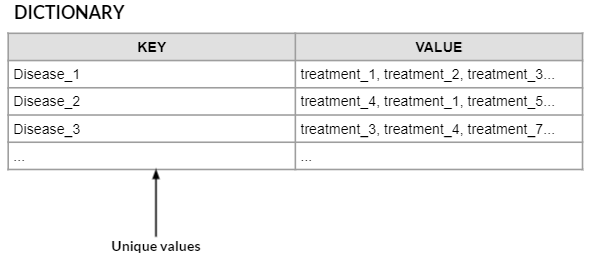

In [ ]:
# Creating dictionary out of the predicted labels from our model
dict={}
for count, labels in enumerate(Y_pred): # we are taking the Y-pred labels and count will have the record ID
    temp="".join(labels) # removing the spaces between the lablels
    #print(count, temp)
    totalD=len(re.findall('D',temp)) # find number of 'D' in the sentence
    totalT=len(re.findall('T',temp)) # find number of 'T' in the sentence
    if totalD>0 and totalT>0: # this means that the sentence has disease and treatment
        indexD=[];indexT=[];start_from=0 # Initializing variables used
        for i in range(totalD):
            foundat=temp.find('D',start_from) # search for 'D' from start_from in the labels
            indexD.append(foundat) # put the foundat index in a list called indexD
            start_from=foundat+1 # re-initialize start_from from the next word
        start_from=0 # initialize the same variable for 'T' labels now
        for i in range(totalT):
            foundat=temp.find('T',start_from) # search for 'T' from start_from in the labels
            indexT.append(foundat) # put the foundat index in a list called indexT
            start_from=foundat+1 # re-initialize start_from from the next word
        disease='' # Initialize the string disease with empty string
        for i in indexD: # Looping through the indexes where 'D' is located
            disease=disease+test_set[count].split()[i] # we are taking i-th word of the count which is index of sentence
            if i+1 not in indexD: # Check condition if the next word is also in the list
                disease=disease+', ' # this will be executed for a new disease
            else:
                disease=disease+' ' # this will be executed for continuation of disease name
        treatment='' # Initialize the string treatment with empty string
        for i in indexT: # Looping through the indexes where 'D' is located
            treatment=treatment+test_set[count].split()[i] # we are taking i-th word of the count which is index of sentence
            if i+1 not in indexT: # Check condition if the next word is also in the list
                treatment=treatment+', ' # this will be executed for a new treatment
            else:
                treatment=treatment+' ' # this will be executed for continuation of treatment
        # finally entering the disease and treatment in the dictionary after removing the last comma and space character
        dict[disease.rstrip(', ')]=treatment.rstrip(', ') 
            
dict

In [ ]:
# Creating dataframe out of the dictionary of disease and treatment
df1=pd.DataFrame(dict.items(),columns=['disease','treatment'])
df1.head()

### Predict the treatment for the disease name: 'hereditary retinoblastoma'

In [ ]:
print('The treatment for hereditary retinoblastoma: ',dict['hereditary retinoblastoma'])

## The treatment for hereditary retinoblastoma:  radiotherapy